In [133]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("dados_regressao.csv");
df.head()

numero_solicitacao             razaoSocial        nomeFantasia  \
0                   1  James Richardson-Patel  Alexandra Williams   
1                   3           Joanna Hudson      Dr. David Rees   
2                   5               Nigel Lee  Dr. Stanley Duncan   
3                   7   Alexander Baker-Wells    Dr. Caroline Ali   
4                   8              Jean Berry       Gregory Gould   

         cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  percentualProtestos  \
0  KEBE17609492220843            0              0.252448                  0.0   
1  GCVQ28531614261293            4              0.624777                  0.0   
2  CGQN15826802440348           20              0.454088                  0.0   
3  PYOL43118620147076           16              0.000000                  NaN   
4  NLUX93496216176463            4              0.350175                  0.0   

        primeiraCompra  prazoMedioRecebimentoVendas  titulosEmAberto  ...  \
0  2015-12-10T00:00:00                            0             0.00  ...   
1  2019-11-27T00:00:00                            0             0.00  ...   
2  2010-07-13T00:00:00                           20          1486.95  ...   
3  2011-03-02T11:27:13                            0             0.00  ...   
4  2007-07-02T00:00:00                          102        208980.00  ...   

   periodoDemonstrativoEmMeses      custos anoFundacao  intervaloFundacao  \
0                         12.0    922289.0      2003.0   Acima de 17 anos   
1                         12.0   1485136.0      2014.0     De 6 a 10 anos   
2                          9.0  40680051.0      2002.0   Acima de 17 anos   
3                         12.0  45795943.0      2004.0    De 11 a 16 anos   
4                          9.0         0.0      2000.0   Acima de 17 anos   

   capitalSocial  restricoes  empresa_MeEppMei scorePontualidade  \
0        90000.0       False              True               1.0   
1        20000.0       False             False               1.0   
2        75000.0       False             False               1.0   
3     30515674.0        True             False               0.0   
4       120000.0       False             False               1.0   

  limiteEmpresaAnaliseCredito  dataAprovadoNivelAnalista  
0                     72600.0        2020-02-03T20:57:33  
1                      5760.0        2020-02-04T16:40:49  
2                     89000.0        2020-02-04T15:06:28  
3                  20635703.0        2020-02-05T14:31:22  
4                    768233.0        2020-02-05T20:05:40  

[5 rows x 38 columns]

In [50]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
anoFundacao                  float64   5095         0     0.000       64   
ativoCirculante              float64   5095         0     0.000     1718   
capitalSocial                float64   5095         0     0.000      291   
cnpjSemTraco                  object   5095         0     0.000     1460   
custos                       float64   5095         0     0.000     1623   
dashboardCorrelacao          float64   5095         0     0.000      510   
dataAprovadoEmComite          object    443      4652     0.913      443   
dataAprovadoNivelAnalista     object   4652       443     0.087     4652   
definicaoRisco                object   5095         0     0.000        4   
diferencaPercentualRisco     float64   5095         0     0.000       73   
duplicatasAReceber           float64   5095         0     0.000     1604   
empresa_MeEppMei                bool   5095         0     0.000        2   
endividamento                float64   5095         0     0.000     1146   
estoque                      float64   5095         0     0.000     1607   
faturamentoBruto             float64   5095         0     0.000     2138   
intervaloFundacao             object   5095         0     0.000        4   
limiteEmpresaAnaliseCredito  float64   5095         0     0.000     1346   
maiorAtraso                    int64   5095         0     0.000      149   
margemBruta                  float64   5095         0     0.000     1755   
margemBrutaAcumulada         float64   5095         0     0.000     1168   
nomeFantasia                  object   5095         0     0.000     1410   
numero_solicitacao             int64   5095         0     0.000     5095   
passivoCirculante            float64   5095         0     0.000     1715   
percentualProtestos          float64   4300       795     0.156        2   
percentualRisco              float64   5095         0     0.000       74   
periodoBalanco                object   5095         0     0.000      122   
periodoDemonstrativoEmMeses  float64   5095         0     0.000       13   
prazoMedioRecebimentoVendas    int64   5095         0     0.000      147   
primeiraCompra                object   5061        34     0.007     1176   
razaoSocial                   object   5095         0     0.000     1427   
restricoes                      bool   5095         0     0.000        2   
scorePontualidade            float64   5095         0     0.000      281   
status                        object   5095         0     0.000        2   
titulosEmAberto              float64   5095         0     0.000      560   
totalAtivo                   float64   5095         0     0.000     1713   
totalPatrimonioLiquido       float64   5095         0     0.000     1688   
valorAprovado                float64   5095         0     0.000      287   
valorSolicitado              float64   5095         0     0.000      298   

                                                   min        25%        50%  \
anoFundacao                                     1000.0     2000.0     2008.0   
ativoCirculante                                  -17.0   630894.5  3319814.0   
capitalSocial                                      0.0    95400.0   200000.0   
cnpjSemTraco                        AADG56617962174727          -          -   
custos                                    -346633805.0        0.0  2330486.0   
dashboardCorrelacao                           -0.99999        0.0        0.0   
dataAprovadoEmComite                                 -          -          -   
dataAprovadoNivelAnalista                            -          -          -   
definicaoRisco               De 0 a 10 % - Muito Baixo          -          -   
diferencaPercentualRisco                      0.264151   0.678571   0.767857   
duplicatasAReceber                         -22780710.0     1653.0   917929.0   
empresa_MeEppMei                                 False        0.0        0.0   
endividamento            

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           5095 non-null   int64  
 1   razaoSocial                  5095 non-null   object 
 2   nomeFantasia                 5095 non-null   object 
 3   cnpjSemTraco                 5095 non-null   object 
 4   maiorAtraso                  5095 non-null   int64  
 5   margemBrutaAcumulada         5095 non-null   float64
 6   percentualProtestos          4300 non-null   float64
 7   primeiraCompra               5061 non-null   object 
 8   prazoMedioRecebimentoVendas  5095 non-null   int64  
 9   titulosEmAberto              5095 non-null   float64
 10  valorSolicitado              5095 non-null   float64
 11  status                       5095 non-null   object 
 12  definicaoRisco               5095 non-null   object 
 13  diferencaPercentua

In [52]:
df_num = df.drop(['cnpjSemTraco', 'percentualProtestos', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'anoFundacao', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses'], axis=1)

In [53]:
X = df_num.drop(['valorAprovado'], axis=1)
Y = df_num.valorAprovado

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [55]:
lm = LinearRegression()
linear = lm.fit(X_train, y_train.ravel())

In [56]:
linear.score(X_test, y_test)

0.2765505053643975

In [57]:
y_pred = lm.predict(X_test)

In [58]:
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 468836.5777654587


In [59]:
df_final = df[['margemBrutaAcumulada', 'percentualRisco', 'restricoes', 'empresa_MeEppMei', 'scorePontualidade', 'endividamento', 'estoque', 'faturamentoBruto', 'custos', 'valorAprovado']]
X = df_final.drop(['valorAprovado'], axis=1)
Y = df_final.valorAprovado

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [61]:
lm = LinearRegression()
linear = lm.fit(X_train, y_train.ravel())

In [62]:
linear.score(X_test, y_test)

0.05220882816384187

In [63]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 536628.4677670148


<AxesSubplot:>

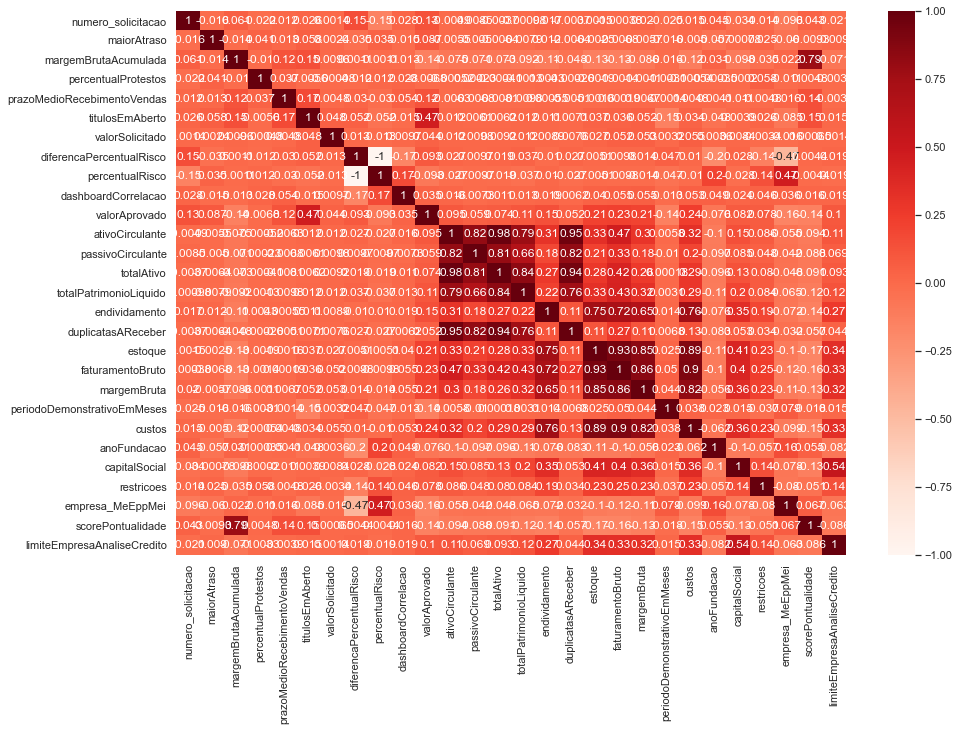

In [64]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, cmap="Reds", center=0, annot=True)

In [65]:
correlation_valor_Aprovado = corr_matrix["valorAprovado"].sort_values(ascending=False)
correlation_valor_Aprovado

valorAprovado                  1.000000
titulosEmAberto                0.468094
custos                         0.238124
faturamentoBruto               0.225751
estoque                        0.211524
margemBruta                    0.205045
endividamento                  0.145796
numero_solicitacao             0.129922
prazoMedioRecebimentoVendas    0.117423
totalPatrimonioLiquido         0.105915
limiteEmpresaAnaliseCredito    0.100190
ativoCirculante                0.094537
diferencaPercentualRisco       0.092887
maiorAtraso                    0.086728
capitalSocial                  0.082253
restricoes                     0.077588
totalAtivo                     0.073912
passivoCirculante              0.059062
duplicatasAReceber             0.052122
valorSolicitado                0.043504
dashboardCorrelacao            0.035304
percentualProtestos           -0.006811
anoFundacao                   -0.076307
percentualRisco               -0.092887
margemBrutaAcumulada          -0.135066


In [119]:
df_final1 = df[['valorAprovado', 'titulosEmAberto', 'custos', 'faturamentoBruto', 'estoque', 'margemBruta']]

In [ ]:
X = df_final1.drop(['valorAprovado'], axis=1)
Y = df_final1.valorAprovado

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [69]:
linear.score(X_test, y_test)

0.24977635348383942

In [70]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 477433.35039893806


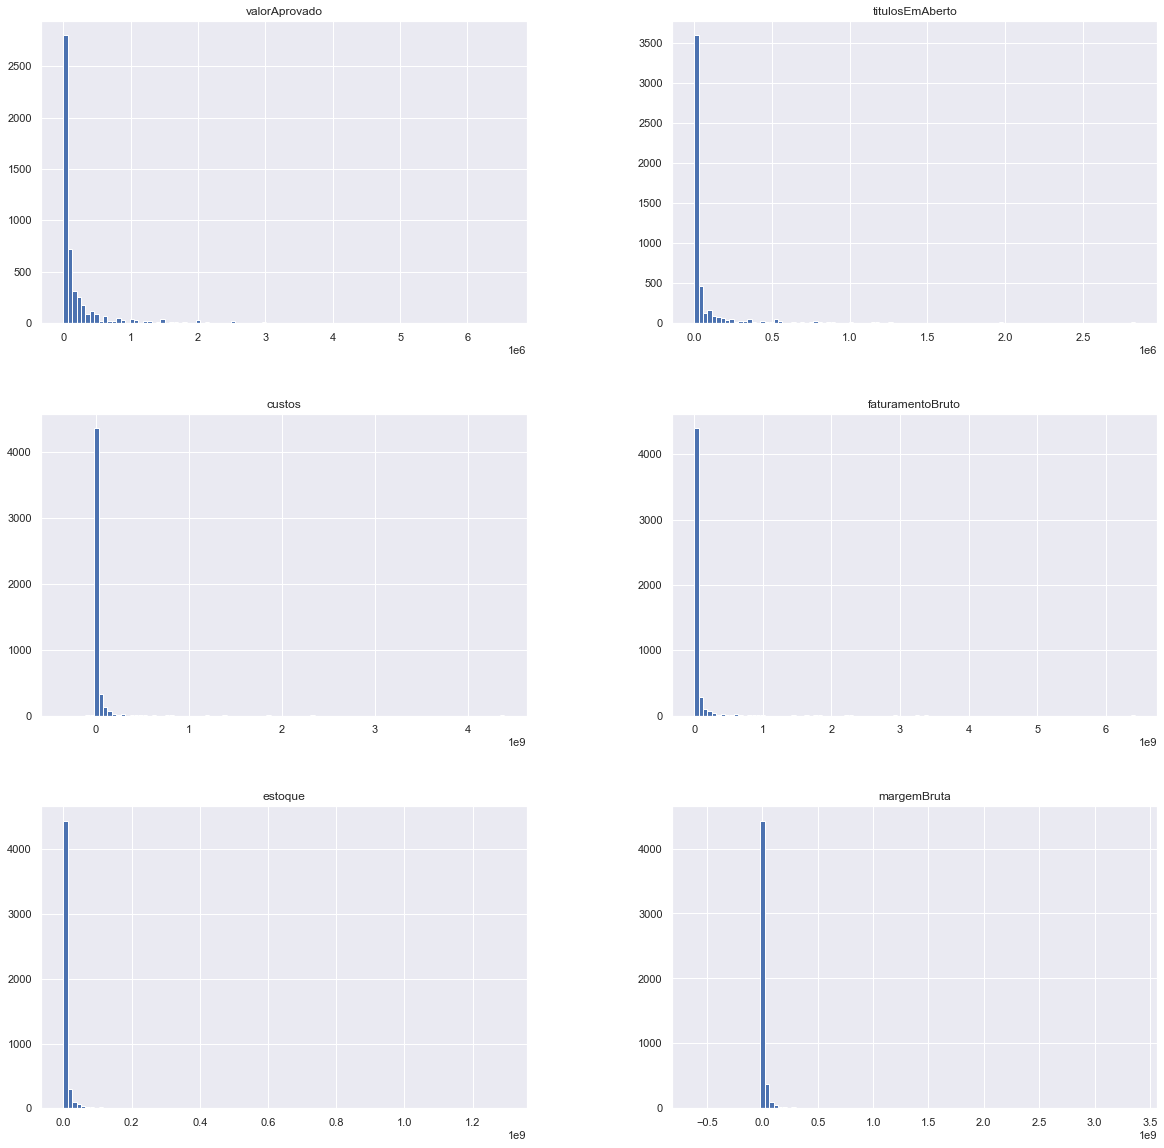

In [82]:
df_final1.hist(bins=100, figsize=(20,20))
plt.show()

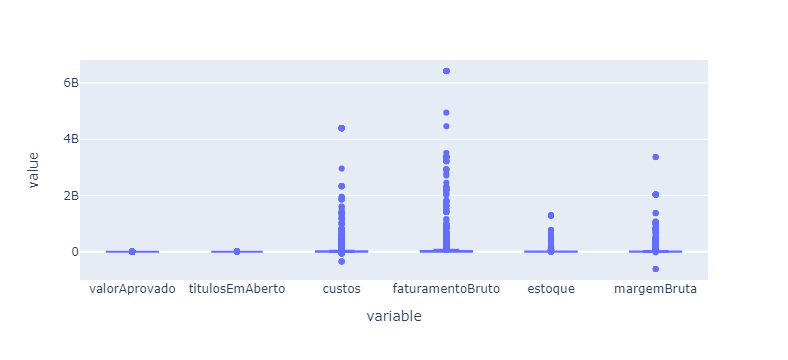

In [83]:
fig = px.box(df_final1)
fig.show()

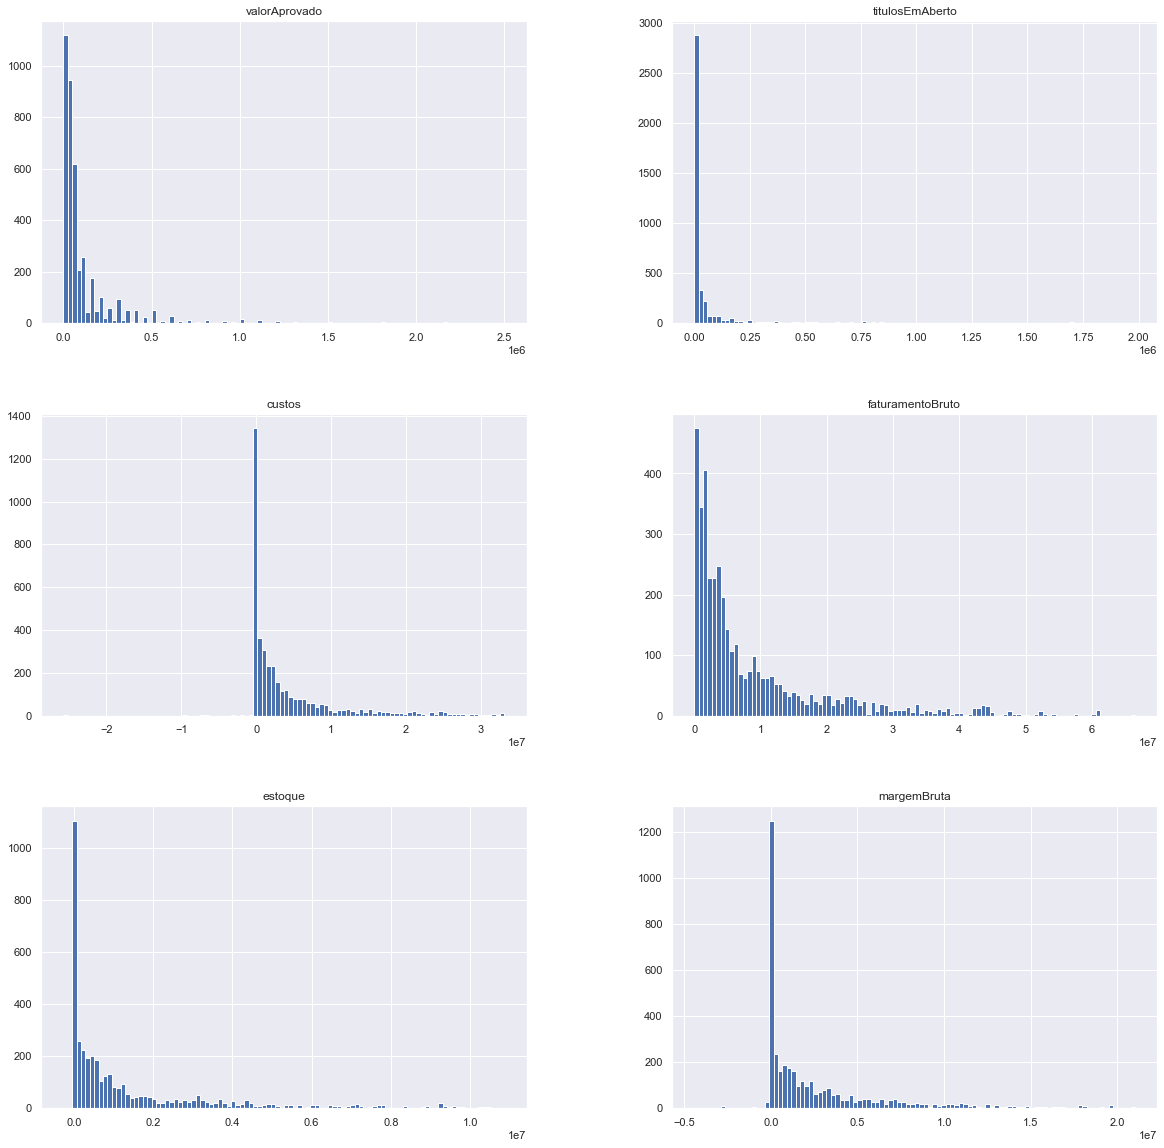

In [111]:
df_final1 = df_final1.drop(df_final1[(df_final1['custos'] > 34000000) | (df_final1['faturamentoBruto'] > 67000000) | (df_final1['estoque'] > 11000000) | (df_final1['margemBruta'] > 21500000) |(df_final1['margemBruta'] < -10000000)].index)
df_final1.hist(bins=100, figsize=(20,20))
plt.show()

In [112]:
X = df_final1.drop(['valorAprovado'], axis=1)
Y = df_final1.valorAprovado

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [114]:
linear.score(X_test, y_test)

0.539416329200695

In [115]:
y_pred = lm.predict(X_test)

In [116]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 132849.64443995623


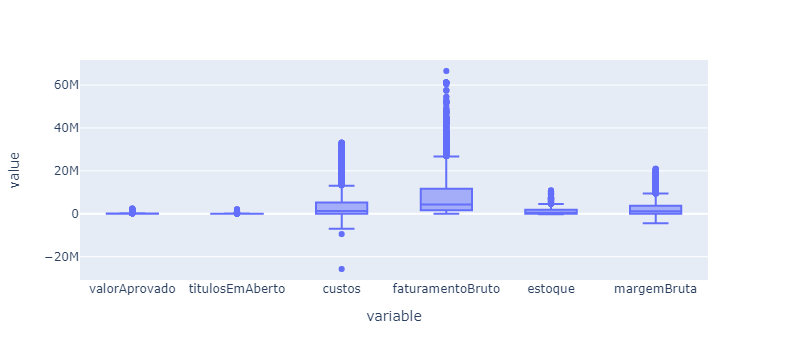

In [117]:
fig = px.box(df_final1)
fig.show()

In [120]:
df_final2 = df[['valorAprovado', 'titulosEmAberto', 'custos', 'faturamentoBruto', 'estoque', 'margemBruta']]
df_final2 = df_final2.drop(df_final1[(df_final2['custos'] > 13500000) | (df_final2['faturamentoBruto'] > 28000000) | (df_final2['estoque'] > 4500000) | (df_final2['margemBruta'] > 8500000) |(df_final2['margemBruta'] < 0)].index)

In [121]:
X = df_final2.drop(['valorAprovado'], axis=1)
Y = df_final2.valorAprovado

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [123]:
linear.score(X_test, y_test)

0.40043214481664424

In [125]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 78981.5103441514


In [126]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valorAprovado     3216 non-null   float64
 1   titulosEmAberto   3216 non-null   float64
 2   custos            3216 non-null   float64
 3   faturamentoBruto  3216 non-null   float64
 4   estoque           3216 non-null   float64
 5   margemBruta       3216 non-null   float64
dtypes: float64(6)
memory usage: 175.9 KB


In [127]:
df_final3 = df.drop(['cnpjSemTraco', 'percentualProtestos', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'anoFundacao', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao',
'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses'], axis=1)

In [128]:
X = df_final3.drop(['valorAprovado'], axis=1)
Y = df_final3.valorAprovado

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [130]:
linear.score(X_test, y_test)

0.2765505053643975

In [131]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 468836.5777654587


In [138]:
for column in df_final3.columns:
    data = df_final3[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) | (data > maximum))
    df_final3[column].loc[outliers] = np.nan
    
df_final3.dropna(inplace=True)

In [139]:
X = df_final3.drop(['valorAprovado'], axis=1)
Y = df_final3.valorAprovado
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [140]:
linear.score(X_test, y_test)

0.7659948662819118

In [141]:
y_pred = lm.predict(X_test)
print('RMSE (root-mean-squared error): {}'.format(math.sqrt(mean_squared_error(y_test,y_pred))))

RMSE (root-mean-squared error): 27541.036372787712


In [142]:
X = df_final3.drop(['valorAprovado'], axis=1)
Y = df_final3.valorAprovado
lm = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
linear = lm.fit(X_train, y_train.ravel())

In [143]:
linear.score(X_test, y_test)

0.7659948662482425